## VISUALIZATIONS OF RESULTS:

you may see some numbers on the legend of the graph that dont make sense, but do not fear: an example of how the distribution works would take the following format:
#### Metadata 0l2d (meaning 0 times upsampled for lassoed, and 2 times upsampled for deselect)
#### Metadata 1l2d (meaning 1 time upsampled for lassoed, and 2 times upsampled for deselect)   
#### Metadata 0l4d (meaning 0 times upsampled for lassoed, and 4 times upsampled for deselect)

Also you will notice for each of these, we compare a baseline with a fully even distribution of classes, and a baseline with a "random upsampling" of classes

## Neccessary imports:

In [16]:
import pandas as pd
import seaborn as sns
import warnings
from matplotlib import pyplot as plt
import numpy as np

warnings.simplefilter("ignore")
PATH = "/home/duboyal_gmail_com/ActiveLearning/Data/Alex/LSUN/"
classes = ('bedroom','bridge','church','class','conf','dining','kitchen','living','restaurant','tower')

In [2]:
#df = pd.DataFrame({'Number':[],'bedroom':[],'bridge':[],'church':[],'class':[],'conf':[],'dining':[],'kitchen':[],'living':[],'restaurant':[],'tower':[],'TotalAccuracy':[]})
#df.to_csv(f"{PATH}/Results_LSUN.csv",index=False)
#df2 = pd.DataFrame({"Number":[],'Experiment':[]})
#df2.to_csv(f'{PATH}/ExperimentLog.csv',index=False)

In [6]:
results = pd.read_csv(f"{PATH}/Results_LSUN.csv",index_col=False)
results['Number'] = results['Number'].astype(int)
exp_log = pd.read_csv(f'{PATH}/ExperimentLog.csv',index_col=False)
results_log = pd.merge(exp_log,results,on='Number')

In [7]:
results_log

,Number,Experiment,bedroom,bridge,church,class,conf,dining,kitchen,living,restaurant,tower,TotalAccuracy
0,0,Baseline,0.683,0.873,0.936,0.792,0.604,0.887,0.882,0.392,0.667,0.717,0.746
1,1,Metadata 1l2d,0.756,0.891,0.915,0.811,0.583,0.755,0.882,0.451,0.646,0.755,0.746
2,2,Metadata 1l3d,0.805,0.891,0.809,0.755,0.604,0.736,0.902,0.471,0.833,0.774,0.758
3,3,Baseline Upsample2,0.707,0.836,0.872,0.698,0.625,0.811,0.882,0.510,0.750,0.717,0.742
4,4,Baseline Upsample,0.756,0.909,0.894,0.698,0.583,0.830,0.765,0.510,0.708,0.736,0.740
5,5,Metadata 0l2d,0.732,0.873,0.894,0.792,0.542,0.679,0.922,0.569,0.833,0.755,0.760
6,6,Metadata 0l3d,0.829,0.927,0.809,0.755,0.562,0.774,0.843,0.529,0.833,0.755,0.762
7,7,Metadata 0l4d,0.854,0.818,0.851,0.755,0.521,0.830,0.882,0.294,0.771,0.774,0.734


In [18]:
baseline = pd.read_csv("/home/duboyal_gmail_com/ActiveLearning/Data/Alex/LSUN/LSUNSample/train.csv")
metadata = pd.read_csv("/home/duboyal_gmail_com/ActiveLearning/Data/Alex/LSUN/LSUNSample/train_meta_1l2d.csv")

In [19]:
def classFreq(baseline,metadata,str1,str2):
    plt.subplots(figsize= (10,5))
    df = pd.DataFrame(baseline['label'].value_counts())
    df = df.reset_index()
    df.columns = ['class','label']
    df['Dataset'] = str1
    df2 = pd.DataFrame(metadata['label'].value_counts())
    df2 = df2.reset_index()
    df2.columns = ['class','label']
    df2['Dataset'] = str2
    df = df.append(df2)
    sns.barplot('class','label',hue = 'Dataset',data=df)
    plt.show()

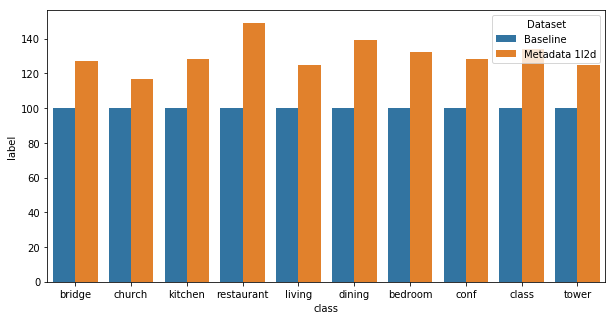

In [41]:
classFreq(baseline,metadata,'Baseline','Metadata 1l2d')

The graph above represents the number of images per class, baseline in blue, compared to upsampled classes in orange. This is number of files per class.

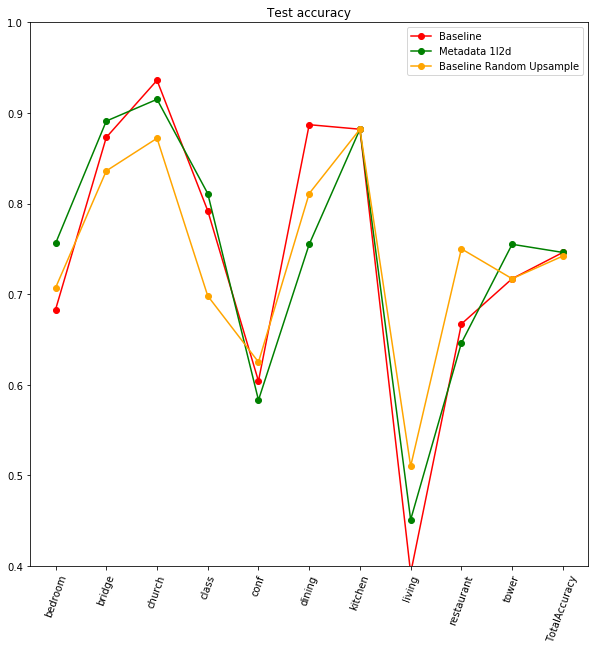

In [26]:
plt.subplots(figsize=(10,10))
x = np.arange(11)
plt.plot(x,results_log.loc[0][2:],label = 'Baseline',marker='o',color = 'red')
plt.plot(x,results_log.loc[1][2:],label = 'Metadata 1l2d',marker = 'o',color = 'green')
plt.plot(x,results_log.loc[3][2:],label = 'Baseline Random Upsample',marker = 'o',color = 'orange')
plt.legend(loc = "uppper left")
plt.xticks(x,results_log.columns.values[2:],rotation = 70)
plt.axis([None,None, 0.4,1])
plt.title("Test accuracy")
#plt.rcParams["figure.figsize"] = (10,10)
plt.show()

The above graph shows the performance in test accuracy for each class

below we will repeat the process, looking at different distributions and their corresponding test performances

In [35]:
baseline_upsample = pd.read_csv("/home/duboyal_gmail_com/ActiveLearning/Data/Alex/LSUN/LSUNSample/train_upsample2.csv")
metadata = pd.read_csv("/home/duboyal_gmail_com/ActiveLearning/Data/Alex/LSUN/LSUNSample/train_meta_1l3d.csv")

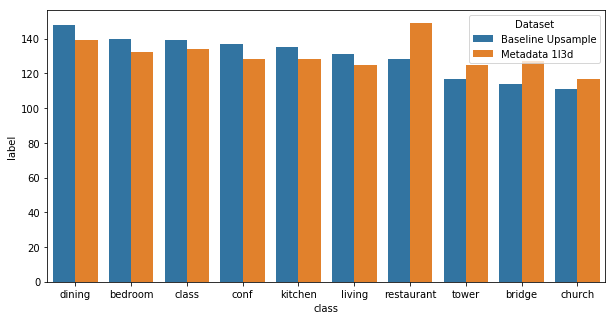

In [42]:
classFreq(baseline_upsample,metadata,'Baseline Upsample','Metadata 1l3d')

The graph above represents the number of images per class

but here for baseline in blue, we perform "Random upsampling" compared to our meta-data-upsampled classes in orange. This is number of files per class.

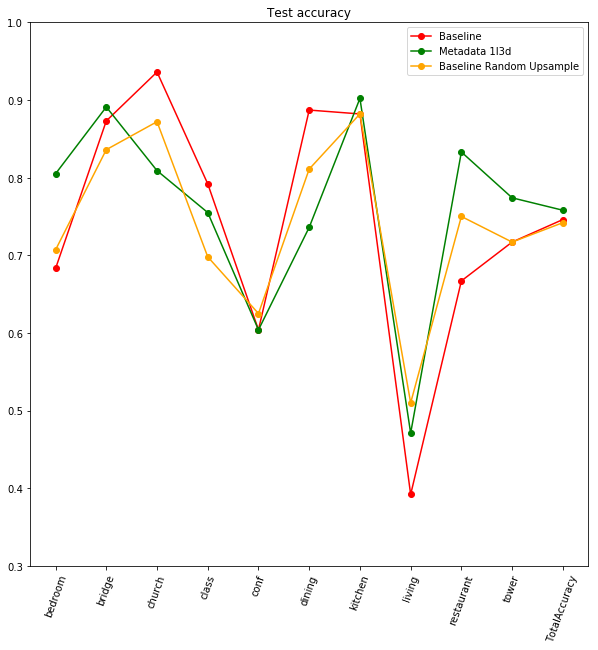

In [40]:
plt.subplots(figsize=(10,10))
x = np.arange(11)
plt.plot(x,results_log.loc[0][2:],label = 'Baseline',marker='o',color = 'red')
plt.plot(x,results_log.loc[2][2:],label = 'Metadata 1l3d',marker = 'o',color = 'green')
plt.plot(x,results_log.loc[3][2:],label = 'Baseline Random Upsample',marker = 'o',color = 'orange')
plt.xticks(x,results_log.columns.values[2:],rotation = 70)
plt.legend(loc = "uppper left")
plt.axis([None,None, 0.3,1])
plt.title("Test accuracy")
#plt.rcParams["figure.figsize"] = (10,10)
plt.show()

corresponding test performance 

### Metadata 0l2d 

In [48]:
baseline_upsample = pd.read_csv("/home/duboyal_gmail_com/ActiveLearning/Data/Alex/LSUN/LSUNSample/train_upsample.csv")
metadata = pd.read_csv("/home/duboyal_gmail_com/ActiveLearning/Data/Alex/LSUN/LSUNSample/train_meta_0l2d.csv")

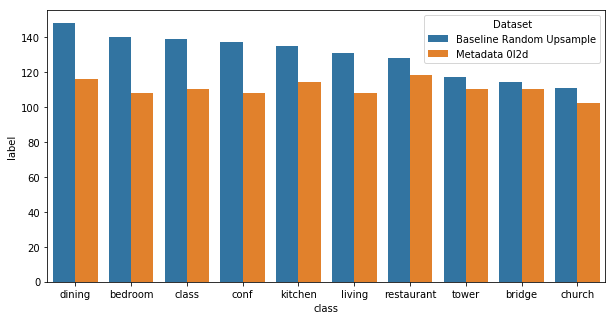

In [44]:
classFreq(baseline_upsample,metadata,'Baseline Random Upsample','Metadata 0l2d')

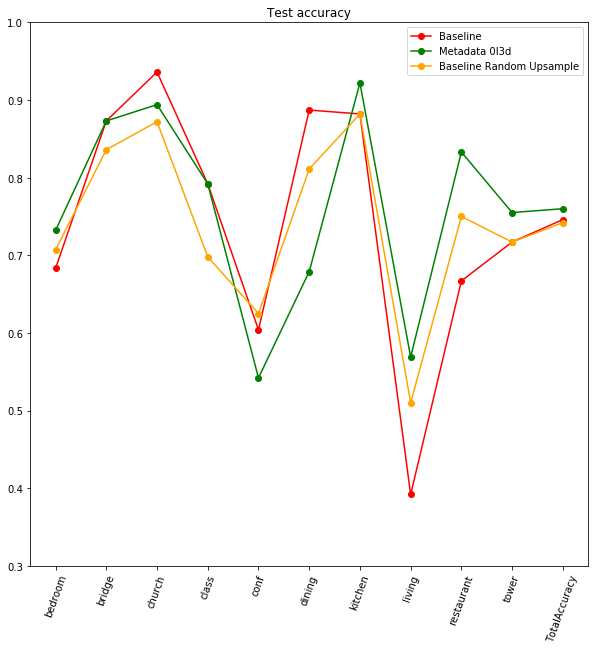

In [56]:
plt.subplots(figsize=(10,10))
x = np.arange(11)
plt.plot(x,results_log.loc[0][2:],label = 'Baseline',marker='o',color = 'red')
plt.plot(x,results_log.loc[5][2:],label = 'Metadata 0l3d',marker = 'o',color = 'green')
plt.plot(x,results_log.loc[3][2:],label = 'Baseline Random Upsample',marker = 'o',color = 'orange')
plt.xticks(x,results_log.columns.values[2:],rotation = 70)
plt.legend(loc = "uppper left")
plt.axis([None,None, 0.3,1])
plt.title("Test accuracy")
#plt.rcParams["figure.figsize"] = (10,10)
plt.show()

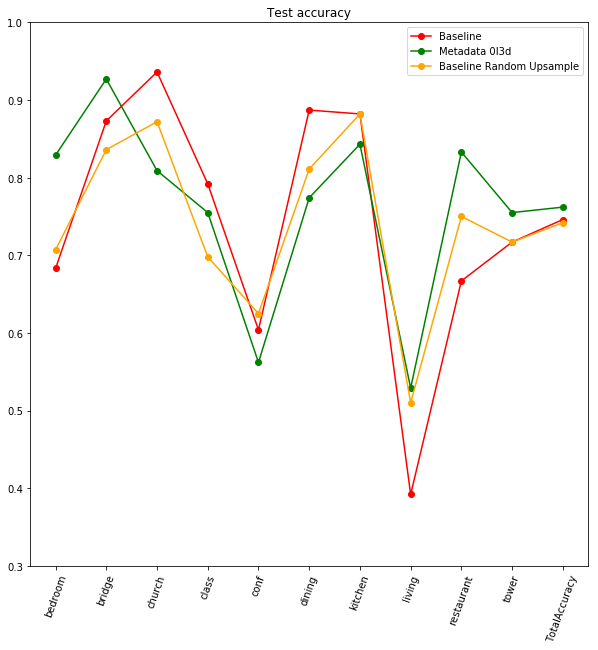

In [55]:
plt.subplots(figsize=(10,10))
x = np.arange(11)
plt.plot(x,results_log.loc[0][2:],label = 'Baseline',marker='o',color = 'red')
plt.plot(x,results_log.loc[6][2:],label = 'Metadata 0l3d',marker = 'o',color = 'green')
plt.plot(x,results_log.loc[3][2:],label = 'Baseline Random Upsample',marker = 'o',color = 'orange')
plt.xticks(x,results_log.columns.values[2:],rotation = 70)
plt.legend(loc = "uppper left")
plt.axis([None,None, 0.3,1])
plt.title("Test accuracy")
#plt.rcParams["figure.figsize"] = (10,10)
plt.show()

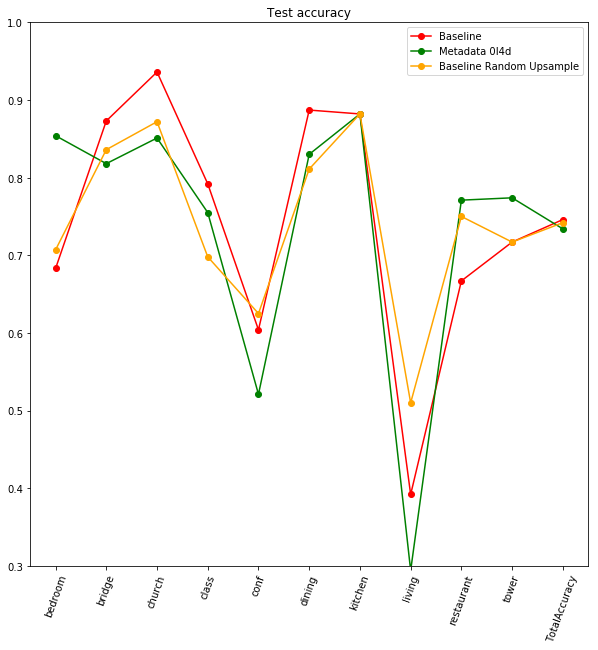

In [58]:
plt.subplots(figsize=(10,10))
x = np.arange(11)
plt.plot(x,results_log.loc[0][2:],label = 'Baseline',marker='o',color = 'red')
plt.plot(x,results_log.loc[7][2:],label = 'Metadata 0l4d',marker = 'o',color = 'green')
plt.plot(x,results_log.loc[3][2:],label = 'Baseline Random Upsample',marker = 'o',color = 'orange')
plt.xticks(x,results_log.columns.values[2:],rotation = 70)
plt.legend(loc = "uppper left")
plt.axis([None,None, 0.3,1])
plt.title("Test accuracy")
#plt.rcParams["figure.figsize"] = (10,10)
plt.show()

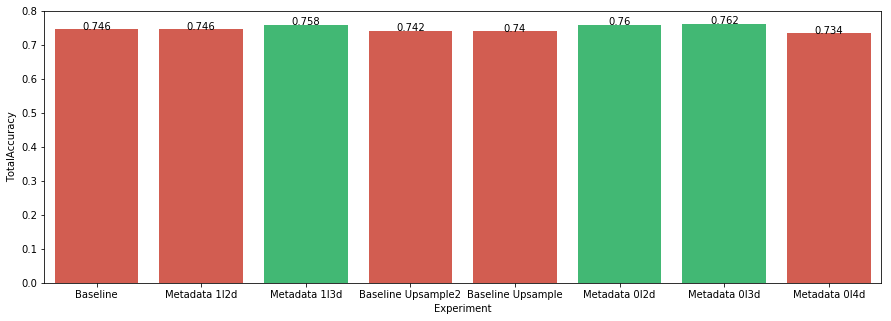

In [80]:
plt.subplots(figsize=(15,5))
colors = ["#e74c3c","#e74c3c","#2ecc71","#e74c3c","#e74c3c","#2ecc71","#2ecc71","#e74c3c"]
g = sns.barplot(results_log['Experiment'],results_log['TotalAccuracy'],data = results_log ,color= sns.set_palette(colors))

for index, row in results_log.iterrows():
    g.text(index,row.TotalAccuracy, round(row.TotalAccuracy,3), color='black', ha="center")
plt.show()

### Conclusion:

The three experiments (upsampling distributions) in green that improved compared to both baselines (being the even distribution and random upsampled baseline)  